# Hyperparameter search for the 3d cnn

In our class presentation 5/31/18, Justin told us that based on the accuracy training curve that we showed, it looks like we're *underfitting*, so he suggested that we use *less* data for this project.

Honestly, this is probably something that we should have tried before, because they told us in lecture that an important step in making sure you're in a good hyperparameter space is being able to **overfit** the training data.


In [9]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

# Loading the other modules I have in parent directories
import sys
PYTHONPATH="../"
sys.path.append(PYTHONPATH)
from dataProcessing import getDataLoaders
from models import FCNet, CNN_3d, layer0_12x12, layer2_12x12, layer0_3x6, count_parameters
from train import check_accuracy, train
from plottingFcts import trainingMetrics, sigBkgEff, plotROC, plotConfusion

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [156]:
loader_train, loader_val, loader_test = getDataLoaders(batch_size=256, N=1000)

In [66]:
#optimizer = optim.Adam(myModel.parameters(), lr = 1e-3)

myModel = CNN_3d()
optimizer = optim.SGD(myModel.parameters(), lr=1e-9, momentum=0.9, nesterov=True)

Output size after the first conv: 16,2.0,6.0,6.0
Output size after the second conv: 8,1.0,4.0,4.0


In [67]:
history, myModel = train(loader_train, loader_val, myModel, 
                         optimizer, epochs=100, returnBest=True)


Epoch 1/100:
Iteration 0, loss = 1.0438
cpu
Got 2 / 3 correct (66.67)

cpu
Got 7 / 18 correct (38.89)
cpu
Got 1 / 3 correct (33.33)

Epoch 2/100:
Iteration 0, loss = 1.0838
cpu
Got 1 / 3 correct (33.33)

cpu
Got 7 / 18 correct (38.89)
cpu
Got 1 / 3 correct (33.33)

Epoch 3/100:
Iteration 0, loss = 1.0824
cpu
Got 1 / 3 correct (33.33)

cpu
Got 6 / 18 correct (33.33)
cpu
Got 1 / 3 correct (33.33)

Epoch 4/100:
Iteration 0, loss = 0.9288
cpu
Got 1 / 3 correct (33.33)

cpu
Got 9 / 18 correct (50.00)
cpu
Got 1 / 3 correct (33.33)

Epoch 5/100:
Iteration 0, loss = 1.1211
cpu
Got 0 / 3 correct (0.00)

cpu
Got 9 / 18 correct (50.00)
cpu
Got 1 / 3 correct (33.33)

Epoch 6/100:
Iteration 0, loss = 0.8687
cpu
Got 1 / 3 correct (33.33)

cpu
Got 8 / 18 correct (44.44)
cpu
Got 1 / 3 correct (33.33)

Epoch 7/100:
Iteration 0, loss = 1.2415
cpu
Got 1 / 3 correct (33.33)

cpu
Got 7 / 18 correct (38.89)
cpu
Got 0 / 3 correct (0.00)

Epoch 8/100:
Iteration 0, loss = 1.3375
cpu
Got 1 / 3 correct (33.33)


Got 0 / 3 correct (0.00)

cpu
Got 8 / 18 correct (44.44)
cpu
Got 2 / 3 correct (66.67)

Epoch 64/100:
Iteration 0, loss = 1.0099
cpu
Got 1 / 3 correct (33.33)

cpu
Got 4 / 18 correct (22.22)
cpu
Got 1 / 3 correct (33.33)

Epoch 65/100:
Iteration 0, loss = 0.9503
cpu
Got 1 / 3 correct (33.33)

cpu
Got 3 / 18 correct (16.67)
cpu
Got 1 / 3 correct (33.33)

Epoch 66/100:
Iteration 0, loss = 1.3185
cpu
Got 1 / 3 correct (33.33)

cpu
Got 5 / 18 correct (27.78)
cpu
Got 1 / 3 correct (33.33)

Epoch 67/100:
Iteration 0, loss = 1.1068
cpu
Got 2 / 3 correct (66.67)

cpu
Got 7 / 18 correct (38.89)
cpu
Got 2 / 3 correct (66.67)

Epoch 68/100:
Iteration 0, loss = 1.1766
cpu
Got 0 / 3 correct (0.00)

cpu
Got 4 / 18 correct (22.22)
cpu
Got 1 / 3 correct (33.33)

Epoch 69/100:
Iteration 0, loss = 1.3735
cpu
Got 1 / 3 correct (33.33)

cpu
Got 4 / 18 correct (22.22)
cpu
Got 1 / 3 correct (33.33)

Epoch 70/100:
Iteration 0, loss = 1.3079
cpu
Got 1 / 3 correct (33.33)

cpu
Got 2 / 18 correct (11.11)
cpu
Go

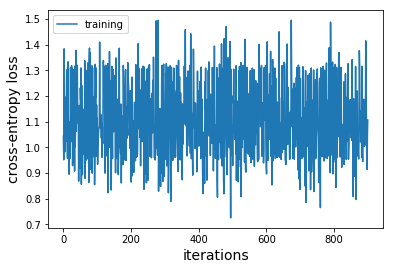

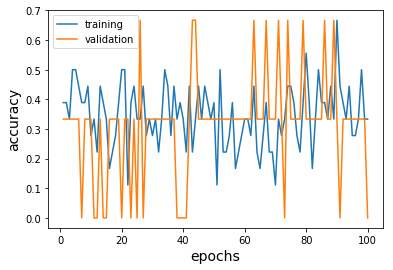

In [68]:
trainingMetrics(history)

In [ ]:
?

In [186]:
fc = myModel = FCNet()

#optim_fc = optim.Adam(myModel.parameters(), lr = 5e-6)
optim_fc = optim.SGD(myModel.parameters(), lr = 5e-5, momentum=.9,nesterov=True)
history, fc = train(loader_train, loader_val, fc, 
                         optim_fc, epochs=1000, returnBest=True)


Epoch 1/1000:
Iteration 0, loss = 1.1130
cpu
Got 107 / 300 correct (35.67)

cpu
Got 670 / 1800 correct (37.22)
cpu
Got 95 / 300 correct (31.67)

Epoch 2/1000:
Iteration 0, loss = 1.0929
cpu
Got 116 / 300 correct (38.67)

cpu
Got 646 / 1800 correct (35.89)
cpu
Got 112 / 300 correct (37.33)

Epoch 3/1000:
Iteration 0, loss = 1.0739
cpu
Got 108 / 300 correct (36.00)

cpu
Got 667 / 1800 correct (37.06)
cpu
Got 112 / 300 correct (37.33)

Epoch 4/1000:
Iteration 0, loss = 1.0775
cpu
Got 114 / 300 correct (38.00)

cpu
Got 704 / 1800 correct (39.11)
cpu
Got 122 / 300 correct (40.67)

Epoch 5/1000:
Iteration 0, loss = 1.0851
cpu
Got 115 / 300 correct (38.33)

cpu
Got 720 / 1800 correct (40.00)
cpu
Got 107 / 300 correct (35.67)

Epoch 6/1000:
Iteration 0, loss = 1.0765
cpu
Got 110 / 300 correct (36.67)

cpu
Got 714 / 1800 correct (39.67)
cpu
Got 113 / 300 correct (37.67)

Epoch 7/1000:
Iteration 0, loss = 1.0797
cpu
Got 113 / 300 correct (37.67)

cpu
Got 679 / 1800 correct (37.72)
cpu
Got 112 /

Got 941 / 1800 correct (52.28)
cpu
Got 138 / 300 correct (46.00)

Epoch 58/1000:
Iteration 0, loss = 1.0280
cpu
Got 144 / 300 correct (48.00)

cpu
Got 889 / 1800 correct (49.39)
cpu
Got 147 / 300 correct (49.00)

Epoch 59/1000:
Iteration 0, loss = 1.0187
cpu
Got 145 / 300 correct (48.33)

cpu
Got 912 / 1800 correct (50.67)
cpu
Got 159 / 300 correct (53.00)

Epoch 60/1000:
Iteration 0, loss = 1.0280
cpu
Got 151 / 300 correct (50.33)

cpu
Got 944 / 1800 correct (52.44)
cpu
Got 148 / 300 correct (49.33)

Epoch 61/1000:
Iteration 0, loss = 1.0315
cpu
Got 159 / 300 correct (53.00)

cpu
Got 929 / 1800 correct (51.61)
cpu
Got 146 / 300 correct (48.67)

Epoch 62/1000:
Iteration 0, loss = 1.0211
cpu
Got 149 / 300 correct (49.67)

cpu
Got 904 / 1800 correct (50.22)
cpu
Got 149 / 300 correct (49.67)

Epoch 63/1000:
Iteration 0, loss = 1.0333
cpu
Got 154 / 300 correct (51.33)

cpu
Got 923 / 1800 correct (51.28)
cpu
Got 156 / 300 correct (52.00)

Epoch 64/1000:
Iteration 0, loss = 1.0233
cpu
Got 15

cpu
Got 1001 / 1800 correct (55.61)
cpu
Got 160 / 300 correct (53.33)

Epoch 114/1000:
Iteration 0, loss = 0.9938
cpu
Got 174 / 300 correct (58.00)

cpu
Got 993 / 1800 correct (55.17)
cpu
Got 165 / 300 correct (55.00)

Epoch 115/1000:
Iteration 0, loss = 0.9859
cpu
Got 169 / 300 correct (56.33)

cpu
Got 995 / 1800 correct (55.28)
cpu
Got 146 / 300 correct (48.67)

Epoch 116/1000:
Iteration 0, loss = 0.9869
cpu
Got 172 / 300 correct (57.33)

cpu
Got 1006 / 1800 correct (55.89)
cpu
Got 164 / 300 correct (54.67)

Epoch 117/1000:
Iteration 0, loss = 0.9958
cpu
Got 169 / 300 correct (56.33)

cpu
Got 998 / 1800 correct (55.44)
cpu
Got 155 / 300 correct (51.67)

Epoch 118/1000:
Iteration 0, loss = 1.0145
cpu
Got 176 / 300 correct (58.67)

cpu
Got 1010 / 1800 correct (56.11)
cpu
Got 168 / 300 correct (56.00)

Epoch 119/1000:
Iteration 0, loss = 0.9924
cpu
Got 172 / 300 correct (57.33)

cpu
Got 988 / 1800 correct (54.89)
cpu
Got 162 / 300 correct (54.00)

Epoch 120/1000:
Iteration 0, loss = 1.0

cpu
Got 1050 / 1800 correct (58.33)
cpu
Got 163 / 300 correct (54.33)

Epoch 170/1000:
Iteration 0, loss = 0.9750
cpu
Got 174 / 300 correct (58.00)

cpu
Got 1056 / 1800 correct (58.67)
cpu
Got 168 / 300 correct (56.00)

Epoch 171/1000:
Iteration 0, loss = 0.9760
cpu
Got 180 / 300 correct (60.00)

cpu
Got 1041 / 1800 correct (57.83)
cpu
Got 175 / 300 correct (58.33)

Epoch 172/1000:
Iteration 0, loss = 0.9738
cpu
Got 166 / 300 correct (55.33)

cpu
Got 1070 / 1800 correct (59.44)
cpu
Got 177 / 300 correct (59.00)

Epoch 173/1000:
Iteration 0, loss = 0.9412
cpu
Got 177 / 300 correct (59.00)

cpu
Got 1054 / 1800 correct (58.56)
cpu
Got 176 / 300 correct (58.67)

Epoch 174/1000:
Iteration 0, loss = 0.9986
cpu
Got 188 / 300 correct (62.67)

cpu
Got 1051 / 1800 correct (58.39)
cpu
Got 178 / 300 correct (59.33)

Epoch 175/1000:
Iteration 0, loss = 0.9672
cpu
Got 174 / 300 correct (58.00)

cpu
Got 1072 / 1800 correct (59.56)
cpu
Got 171 / 300 correct (57.00)

Epoch 176/1000:
Iteration 0, loss =

Got 1116 / 1800 correct (62.00)
cpu
Got 176 / 300 correct (58.67)

Epoch 225/1000:
Iteration 0, loss = 0.9080
cpu
Got 164 / 300 correct (54.67)

cpu
Got 1091 / 1800 correct (60.61)
cpu
Got 180 / 300 correct (60.00)

Epoch 226/1000:
Iteration 0, loss = 0.9240
cpu
Got 171 / 300 correct (57.00)

cpu
Got 1115 / 1800 correct (61.94)
cpu
Got 185 / 300 correct (61.67)

Epoch 227/1000:
Iteration 0, loss = 0.8968
cpu
Got 185 / 300 correct (61.67)

cpu
Got 1088 / 1800 correct (60.44)
cpu
Got 178 / 300 correct (59.33)

Epoch 228/1000:
Iteration 0, loss = 0.9568
cpu
Got 178 / 300 correct (59.33)

cpu
Got 1082 / 1800 correct (60.11)
cpu
Got 182 / 300 correct (60.67)

Epoch 229/1000:
Iteration 0, loss = 0.9386
cpu
Got 174 / 300 correct (58.00)

cpu
Got 1093 / 1800 correct (60.72)
cpu
Got 181 / 300 correct (60.33)

Epoch 230/1000:
Iteration 0, loss = 0.9181
cpu
Got 180 / 300 correct (60.00)

cpu
Got 1108 / 1800 correct (61.56)
cpu
Got 185 / 300 correct (61.67)

Epoch 231/1000:
Iteration 0, loss = 0.9

Got 1128 / 1800 correct (62.67)
cpu
Got 170 / 300 correct (56.67)

Epoch 281/1000:
Iteration 0, loss = 0.9115
cpu
Got 193 / 300 correct (64.33)

cpu
Got 1120 / 1800 correct (62.22)
cpu
Got 186 / 300 correct (62.00)

Epoch 282/1000:
Iteration 0, loss = 0.8741
cpu
Got 185 / 300 correct (61.67)

cpu
Got 1134 / 1800 correct (63.00)
cpu
Got 185 / 300 correct (61.67)

Epoch 283/1000:
Iteration 0, loss = 0.8988
cpu
Got 201 / 300 correct (67.00)

cpu
Got 1134 / 1800 correct (63.00)
cpu
Got 185 / 300 correct (61.67)

Epoch 284/1000:
Iteration 0, loss = 0.8797
cpu
Got 180 / 300 correct (60.00)

cpu
Got 1117 / 1800 correct (62.06)
cpu
Got 178 / 300 correct (59.33)

Epoch 285/1000:
Iteration 0, loss = 0.8737
cpu
Got 192 / 300 correct (64.00)

cpu
Got 1105 / 1800 correct (61.39)
cpu
Got 187 / 300 correct (62.33)

Epoch 286/1000:
Iteration 0, loss = 0.8793
cpu
Got 188 / 300 correct (62.67)

cpu
Got 1121 / 1800 correct (62.28)
cpu
Got 189 / 300 correct (63.00)

Epoch 287/1000:
Iteration 0, loss = 0.9

Iteration 0, loss = 0.8740
cpu
Got 187 / 300 correct (62.33)

cpu
Got 1127 / 1800 correct (62.61)
cpu
Got 189 / 300 correct (63.00)

Epoch 337/1000:
Iteration 0, loss = 0.8680
cpu
Got 191 / 300 correct (63.67)

cpu
Got 1190 / 1800 correct (66.11)
cpu
Got 193 / 300 correct (64.33)

Epoch 338/1000:
Iteration 0, loss = 0.8593
cpu
Got 195 / 300 correct (65.00)

cpu
Got 1153 / 1800 correct (64.06)
cpu
Got 196 / 300 correct (65.33)

Epoch 339/1000:
Iteration 0, loss = 0.8469
cpu
Got 195 / 300 correct (65.00)

cpu
Got 1138 / 1800 correct (63.22)
cpu
Got 182 / 300 correct (60.67)

Epoch 340/1000:
Iteration 0, loss = 0.8431
cpu
Got 198 / 300 correct (66.00)

cpu
Got 1170 / 1800 correct (65.00)
cpu
Got 191 / 300 correct (63.67)

Epoch 341/1000:
Iteration 0, loss = 0.8651
cpu
Got 193 / 300 correct (64.33)

cpu
Got 1161 / 1800 correct (64.50)
cpu
Got 190 / 300 correct (63.33)

Epoch 342/1000:
Iteration 0, loss = 0.8618
cpu
Got 186 / 300 correct (62.00)

cpu
Got 1148 / 1800 correct (63.78)
cpu
Got 

Got 183 / 300 correct (61.00)

Epoch 392/1000:
Iteration 0, loss = 0.8446
cpu
Got 181 / 300 correct (60.33)

cpu
Got 1173 / 1800 correct (65.17)
cpu
Got 189 / 300 correct (63.00)

Epoch 393/1000:
Iteration 0, loss = 0.8528
cpu
Got 189 / 300 correct (63.00)

cpu
Got 1171 / 1800 correct (65.06)
cpu
Got 182 / 300 correct (60.67)

Epoch 394/1000:
Iteration 0, loss = 0.8486
cpu
Got 196 / 300 correct (65.33)

cpu
Got 1158 / 1800 correct (64.33)
cpu
Got 195 / 300 correct (65.00)

Epoch 395/1000:
Iteration 0, loss = 0.8683
cpu
Got 193 / 300 correct (64.33)

cpu
Got 1143 / 1800 correct (63.50)
cpu
Got 196 / 300 correct (65.33)

Epoch 396/1000:
Iteration 0, loss = 0.8413
cpu
Got 188 / 300 correct (62.67)

cpu
Got 1167 / 1800 correct (64.83)
cpu
Got 193 / 300 correct (64.33)

Epoch 397/1000:
Iteration 0, loss = 0.8330
cpu
Got 185 / 300 correct (61.67)

cpu
Got 1156 / 1800 correct (64.22)
cpu
Got 186 / 300 correct (62.00)

Epoch 398/1000:
Iteration 0, loss = 0.8104
cpu
Got 191 / 300 correct (63.67

cpu
Got 1187 / 1800 correct (65.94)
cpu
Got 192 / 300 correct (64.00)

Epoch 448/1000:
Iteration 0, loss = 0.8010
cpu
Got 194 / 300 correct (64.67)

cpu
Got 1170 / 1800 correct (65.00)
cpu
Got 187 / 300 correct (62.33)

Epoch 449/1000:
Iteration 0, loss = 0.8583
cpu
Got 191 / 300 correct (63.67)

cpu
Got 1192 / 1800 correct (66.22)
cpu
Got 192 / 300 correct (64.00)

Epoch 450/1000:
Iteration 0, loss = 0.7979
cpu
Got 186 / 300 correct (62.00)

cpu
Got 1155 / 1800 correct (64.17)
cpu
Got 197 / 300 correct (65.67)

Epoch 451/1000:
Iteration 0, loss = 0.7922
cpu
Got 179 / 300 correct (59.67)

cpu
Got 1179 / 1800 correct (65.50)
cpu
Got 197 / 300 correct (65.67)

Epoch 452/1000:
Iteration 0, loss = 0.7913
cpu
Got 194 / 300 correct (64.67)

cpu
Got 1173 / 1800 correct (65.17)
cpu
Got 188 / 300 correct (62.67)

Epoch 453/1000:
Iteration 0, loss = 0.8071
cpu
Got 189 / 300 correct (63.00)

cpu
Got 1171 / 1800 correct (65.06)
cpu
Got 188 / 300 correct (62.67)

Epoch 454/1000:
Iteration 0, loss =

Got 1195 / 1800 correct (66.39)
cpu
Got 187 / 300 correct (62.33)

Epoch 503/1000:
Iteration 0, loss = 0.7842
cpu
Got 189 / 300 correct (63.00)

cpu
Got 1184 / 1800 correct (65.78)
cpu
Got 198 / 300 correct (66.00)

Epoch 504/1000:
Iteration 0, loss = 0.7861
cpu
Got 190 / 300 correct (63.33)

cpu
Got 1140 / 1800 correct (63.33)
cpu
Got 186 / 300 correct (62.00)

Epoch 505/1000:
Iteration 0, loss = 0.8061
cpu
Got 183 / 300 correct (61.00)

cpu
Got 1176 / 1800 correct (65.33)
cpu
Got 193 / 300 correct (64.33)

Epoch 506/1000:
Iteration 0, loss = 0.7681
cpu
Got 196 / 300 correct (65.33)

cpu
Got 1169 / 1800 correct (64.94)
cpu
Got 183 / 300 correct (61.00)

Epoch 507/1000:
Iteration 0, loss = 0.7949
cpu
Got 184 / 300 correct (61.33)

cpu
Got 1202 / 1800 correct (66.78)
cpu
Got 194 / 300 correct (64.67)

Epoch 508/1000:
Iteration 0, loss = 0.7841
cpu
Got 185 / 300 correct (61.67)

cpu
Got 1163 / 1800 correct (64.61)
cpu
Got 184 / 300 correct (61.33)

Epoch 509/1000:
Iteration 0, loss = 0.7

Iteration 0, loss = 0.7636
cpu
Got 205 / 300 correct (68.33)

cpu
Got 1204 / 1800 correct (66.89)
cpu
Got 199 / 300 correct (66.33)

Epoch 559/1000:
Iteration 0, loss = 0.7832
cpu
Got 190 / 300 correct (63.33)

cpu
Got 1202 / 1800 correct (66.78)
cpu
Got 204 / 300 correct (68.00)

Epoch 560/1000:
Iteration 0, loss = 0.7516
cpu
Got 197 / 300 correct (65.67)

cpu
Got 1237 / 1800 correct (68.72)
cpu
Got 195 / 300 correct (65.00)

Epoch 561/1000:
Iteration 0, loss = 0.7871
cpu
Got 192 / 300 correct (64.00)

cpu
Got 1209 / 1800 correct (67.17)
cpu
Got 199 / 300 correct (66.33)

Epoch 562/1000:
Iteration 0, loss = 0.7445
cpu
Got 196 / 300 correct (65.33)

cpu
Got 1175 / 1800 correct (65.28)
cpu
Got 191 / 300 correct (63.67)

Epoch 563/1000:
Iteration 0, loss = 0.7815
cpu
Got 193 / 300 correct (64.33)

cpu
Got 1192 / 1800 correct (66.22)
cpu
Got 190 / 300 correct (63.33)

Epoch 564/1000:
Iteration 0, loss = 0.8155
cpu
Got 186 / 300 correct (62.00)

cpu
Got 1198 / 1800 correct (66.56)
cpu
Got 

Iteration 0, loss = 0.7546
cpu
Got 192 / 300 correct (64.00)

cpu
Got 1216 / 1800 correct (67.56)
cpu
Got 194 / 300 correct (64.67)

Epoch 614/1000:
Iteration 0, loss = 0.7750
cpu
Got 203 / 300 correct (67.67)

cpu
Got 1200 / 1800 correct (66.67)
cpu
Got 195 / 300 correct (65.00)

Epoch 615/1000:
Iteration 0, loss = 0.7534
cpu
Got 190 / 300 correct (63.33)

cpu
Got 1230 / 1800 correct (68.33)
cpu
Got 190 / 300 correct (63.33)

Epoch 616/1000:
Iteration 0, loss = 0.7255
cpu
Got 193 / 300 correct (64.33)

cpu
Got 1233 / 1800 correct (68.50)
cpu
Got 186 / 300 correct (62.00)

Epoch 617/1000:
Iteration 0, loss = 0.7494
cpu
Got 198 / 300 correct (66.00)

cpu
Got 1199 / 1800 correct (66.61)
cpu
Got 206 / 300 correct (68.67)

Epoch 618/1000:
Iteration 0, loss = 0.7456
cpu
Got 202 / 300 correct (67.33)

cpu
Got 1191 / 1800 correct (66.17)
cpu
Got 194 / 300 correct (64.67)

Epoch 619/1000:
Iteration 0, loss = 0.7462
cpu
Got 196 / 300 correct (65.33)

cpu
Got 1232 / 1800 correct (68.44)
cpu
Got 

Got 1223 / 1800 correct (67.94)
cpu
Got 201 / 300 correct (67.00)

Epoch 669/1000:
Iteration 0, loss = 0.7004
cpu
Got 196 / 300 correct (65.33)

cpu
Got 1217 / 1800 correct (67.61)
cpu
Got 196 / 300 correct (65.33)

Epoch 670/1000:
Iteration 0, loss = 0.7299
cpu
Got 194 / 300 correct (64.67)

cpu
Got 1222 / 1800 correct (67.89)
cpu
Got 195 / 300 correct (65.00)

Epoch 671/1000:
Iteration 0, loss = 0.7590
cpu
Got 191 / 300 correct (63.67)

cpu
Got 1236 / 1800 correct (68.67)
cpu
Got 197 / 300 correct (65.67)

Epoch 672/1000:
Iteration 0, loss = 0.7152
cpu
Got 212 / 300 correct (70.67)

cpu
Got 1224 / 1800 correct (68.00)
cpu
Got 203 / 300 correct (67.67)

Epoch 673/1000:
Iteration 0, loss = 0.7206
cpu
Got 191 / 300 correct (63.67)

cpu
Got 1208 / 1800 correct (67.11)
cpu
Got 201 / 300 correct (67.00)

Epoch 674/1000:
Iteration 0, loss = 0.7229
cpu
Got 202 / 300 correct (67.33)

cpu
Got 1249 / 1800 correct (69.39)
cpu
Got 198 / 300 correct (66.00)

Epoch 675/1000:
Iteration 0, loss = 0.7

cpu
Got 1249 / 1800 correct (69.39)
cpu
Got 195 / 300 correct (65.00)

Epoch 725/1000:
Iteration 0, loss = 0.7353
cpu
Got 197 / 300 correct (65.67)

cpu
Got 1222 / 1800 correct (67.89)
cpu
Got 206 / 300 correct (68.67)

Epoch 726/1000:
Iteration 0, loss = 0.7389
cpu
Got 200 / 300 correct (66.67)

cpu
Got 1230 / 1800 correct (68.33)
cpu
Got 194 / 300 correct (64.67)

Epoch 727/1000:
Iteration 0, loss = 0.7445
cpu
Got 199 / 300 correct (66.33)

cpu
Got 1228 / 1800 correct (68.22)
cpu
Got 202 / 300 correct (67.33)

Epoch 728/1000:
Iteration 0, loss = 0.7319
cpu
Got 197 / 300 correct (65.67)

cpu
Got 1213 / 1800 correct (67.39)
cpu
Got 197 / 300 correct (65.67)

Epoch 729/1000:
Iteration 0, loss = 0.6919
cpu
Got 198 / 300 correct (66.00)

cpu
Got 1249 / 1800 correct (69.39)
cpu
Got 194 / 300 correct (64.67)

Epoch 730/1000:
Iteration 0, loss = 0.6792
cpu
Got 196 / 300 correct (65.33)

cpu
Got 1212 / 1800 correct (67.33)
cpu
Got 210 / 300 correct (70.00)

Epoch 731/1000:
Iteration 0, loss =

Got 191 / 300 correct (63.67)

cpu
Got 1207 / 1800 correct (67.06)
cpu
Got 185 / 300 correct (61.67)

Epoch 781/1000:
Iteration 0, loss = 0.6842
cpu
Got 204 / 300 correct (68.00)

cpu
Got 1275 / 1800 correct (70.83)
cpu
Got 202 / 300 correct (67.33)

Epoch 782/1000:
Iteration 0, loss = 0.7215
cpu
Got 205 / 300 correct (68.33)

cpu
Got 1246 / 1800 correct (69.22)
cpu
Got 193 / 300 correct (64.33)

Epoch 783/1000:
Iteration 0, loss = 0.7434
cpu
Got 201 / 300 correct (67.00)

cpu
Got 1274 / 1800 correct (70.78)
cpu
Got 196 / 300 correct (65.33)

Epoch 784/1000:
Iteration 0, loss = 0.6756
cpu
Got 200 / 300 correct (66.67)

cpu
Got 1269 / 1800 correct (70.50)
cpu
Got 207 / 300 correct (69.00)

Epoch 785/1000:
Iteration 0, loss = 0.7144
cpu
Got 203 / 300 correct (67.67)

cpu
Got 1244 / 1800 correct (69.11)
cpu
Got 211 / 300 correct (70.33)

Epoch 786/1000:
Iteration 0, loss = 0.7190
cpu
Got 205 / 300 correct (68.33)

cpu
Got 1247 / 1800 correct (69.28)
cpu
Got 209 / 300 correct (69.67)

Epoc

Got 203 / 300 correct (67.67)

cpu
Got 1215 / 1800 correct (67.50)
cpu
Got 200 / 300 correct (66.67)

Epoch 836/1000:
Iteration 0, loss = 0.6808
cpu
Got 205 / 300 correct (68.33)

cpu
Got 1264 / 1800 correct (70.22)
cpu
Got 202 / 300 correct (67.33)

Epoch 837/1000:
Iteration 0, loss = 0.6740
cpu
Got 210 / 300 correct (70.00)

cpu
Got 1228 / 1800 correct (68.22)
cpu
Got 195 / 300 correct (65.00)

Epoch 838/1000:
Iteration 0, loss = 0.7122
cpu
Got 205 / 300 correct (68.33)

cpu
Got 1275 / 1800 correct (70.83)
cpu
Got 197 / 300 correct (65.67)

Epoch 839/1000:
Iteration 0, loss = 0.6958
cpu
Got 200 / 300 correct (66.67)

cpu
Got 1241 / 1800 correct (68.94)
cpu
Got 198 / 300 correct (66.00)

Epoch 840/1000:
Iteration 0, loss = 0.6958
cpu
Got 208 / 300 correct (69.33)

cpu
Got 1236 / 1800 correct (68.67)
cpu
Got 199 / 300 correct (66.33)

Epoch 841/1000:
Iteration 0, loss = 0.7265
cpu
Got 203 / 300 correct (67.67)

cpu
Got 1261 / 1800 correct (70.06)
cpu
Got 204 / 300 correct (68.00)

Epoc

cpu
Got 1255 / 1800 correct (69.72)
cpu
Got 198 / 300 correct (66.00)

Epoch 892/1000:
Iteration 0, loss = 0.6728
cpu
Got 203 / 300 correct (67.67)

cpu
Got 1239 / 1800 correct (68.83)
cpu
Got 198 / 300 correct (66.00)

Epoch 893/1000:
Iteration 0, loss = 0.6642
cpu
Got 201 / 300 correct (67.00)

cpu
Got 1278 / 1800 correct (71.00)
cpu
Got 201 / 300 correct (67.00)

Epoch 894/1000:
Iteration 0, loss = 0.7078
cpu
Got 206 / 300 correct (68.67)

cpu
Got 1242 / 1800 correct (69.00)
cpu
Got 199 / 300 correct (66.33)

Epoch 895/1000:
Iteration 0, loss = 0.6838
cpu
Got 209 / 300 correct (69.67)

cpu
Got 1268 / 1800 correct (70.44)
cpu
Got 197 / 300 correct (65.67)

Epoch 896/1000:
Iteration 0, loss = 0.6739
cpu
Got 194 / 300 correct (64.67)

cpu
Got 1265 / 1800 correct (70.28)
cpu
Got 206 / 300 correct (68.67)

Epoch 897/1000:
Iteration 0, loss = 0.7198
cpu
Got 204 / 300 correct (68.00)

cpu
Got 1276 / 1800 correct (70.89)
cpu
Got 197 / 300 correct (65.67)

Epoch 898/1000:
Iteration 0, loss =

cpu
Got 1255 / 1800 correct (69.72)
cpu
Got 205 / 300 correct (68.33)

Epoch 948/1000:
Iteration 0, loss = 0.6656
cpu
Got 201 / 300 correct (67.00)

cpu
Got 1238 / 1800 correct (68.78)
cpu
Got 200 / 300 correct (66.67)

Epoch 949/1000:
Iteration 0, loss = 0.6878
cpu
Got 193 / 300 correct (64.33)

cpu
Got 1240 / 1800 correct (68.89)
cpu
Got 206 / 300 correct (68.67)

Epoch 950/1000:
Iteration 0, loss = 0.6391
cpu
Got 206 / 300 correct (68.67)

cpu
Got 1262 / 1800 correct (70.11)
cpu
Got 194 / 300 correct (64.67)

Epoch 951/1000:
Iteration 0, loss = 0.6796
cpu
Got 200 / 300 correct (66.67)

cpu
Got 1262 / 1800 correct (70.11)
cpu
Got 205 / 300 correct (68.33)

Epoch 952/1000:
Iteration 0, loss = 0.7009
cpu
Got 196 / 300 correct (65.33)

cpu
Got 1257 / 1800 correct (69.83)
cpu
Got 202 / 300 correct (67.33)

Epoch 953/1000:
Iteration 0, loss = 0.6857
cpu
Got 208 / 300 correct (69.33)

cpu
Got 1260 / 1800 correct (70.00)
cpu
Got 205 / 300 correct (68.33)

Epoch 954/1000:
Iteration 0, loss =

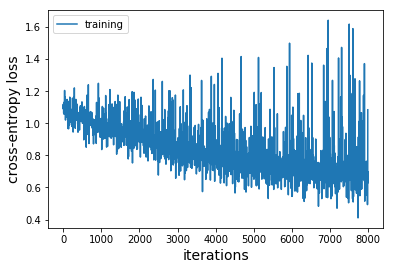

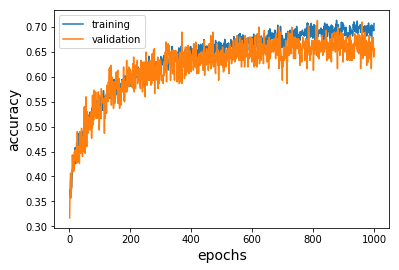

In [187]:
trainingMetrics(history)

In [175]:
check_accuracy(loader_val,fc)

cpu
Got 195 / 300 correct (65.00)


In [183]:
type(1e4)

float